In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf



In [16]:
data = pd.read_csv('/content/Android_Malware.csv')
data = data.sample(n=30000)
data.head(100)

<ipython-input-16-af1bb39588ad>:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Android_Malware.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
150248,2805,180.149.153.242-10.42.0.151-80-58726-6,180.149.153.242,80,10.42.0.151,58726.0,6.0,22/06/2017 12:22:21,2924,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
44812,2608,202.77.129.150-10.42.0.211-80-51971-6,10.42.0.211,51971,202.77.129.150,80.0,6.0,14/06/2017 10:50:12,75549155,4,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
214763,1509,10.42.0.211-54.192.36.142-58623-443-6,10.42.0.211,58623,54.192.36.142,443.0,6.0,27/06/2017 05:38:29,10739907,13,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
51973,4289,172.217.2.110-10.42.0.211-443-37551-6,172.217.2.110,443,10.42.0.211,37551.0,6.0,14/06/2017 11:54:14,2177,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
149155,1712,10.42.0.151-59.38.112.48-54028-443-6,10.42.0.151,54028,59.38.112.48,443.0,6.0,22/06/2017 12:49:56,34895178,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331286,1184,10.42.0.151-31.13.71.3-44425-443-6,10.42.0.151,44425,31.13.71.3,443.0,6.0,10/07/2017 10:26:00,249736,6,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
101277,3193,10.42.0.211-106.39.169.66-33116-443-6,10.42.0.211,33116,106.39.169.66,443.0,6.0,15/06/2017 04:39:32,1543,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
23091,1571,219.142.78.162-10.42.0.211-443-52411-6,10.42.0.211,52411,219.142.78.162,443.0,6.0,13/06/2017 08:50:24,9657275,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
250203,446,10.42.0.151-58.63.236.212-49025-443-6,10.42.0.151,49025,58.63.236.212,443.0,6.0,30/06/2017 11:15:10,55835599,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware


In [6]:
data.dtypes

,0
Unnamed: 0,int64
Flow ID,object
Source IP,object
Source Port,int64
Destination IP,object
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


In [17]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
150248,2805,180.149.153.242-10.42.0.151-80-58726-6,180.149.153.242,80,10.42.0.151,58726.0,6.0,22/06/2017 12:22:21,2924,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
44812,2608,202.77.129.150-10.42.0.211-80-51971-6,10.42.0.211,51971,202.77.129.150,80.0,6.0,14/06/2017 10:50:12,75549155,4,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
214763,1509,10.42.0.211-54.192.36.142-58623-443-6,10.42.0.211,58623,54.192.36.142,443.0,6.0,27/06/2017 05:38:29,10739907,13,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
51973,4289,172.217.2.110-10.42.0.211-443-37551-6,172.217.2.110,443,10.42.0.211,37551.0,6.0,14/06/2017 11:54:14,2177,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
149155,1712,10.42.0.151-59.38.112.48-54028-443-6,10.42.0.151,54028,59.38.112.48,443.0,6.0,22/06/2017 12:49:56,34895178,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250643,886,10.42.0.151-31.13.71.3-51874-443-6,31.13.71.3,443,10.42.0.151,51874.0,6.0,30/06/2017 11:08:29,127879,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
86230,1501,10.42.0.151-119.146.74.33-35876-443-6,10.42.0.151,35876,119.146.74.33,443.0,6.0,15/06/2017 01:54:21,5449433,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
129428,300,10.42.0.211-52.84.29.112-52766-443-6,10.42.0.211,52766,52.84.29.112,443.0,6.0,15/06/2017 11:37:11,550702,62,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
334732,3,172.217.12.206-10.42.0.211-443-59405-6,10.42.0.211,59405,172.217.12.206,443.0,6.0,16/06/2017 06:54:54,258,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
      if data[col].apply(type).nunique() > 1:
          data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# for y_el in y_train:
#   print(le.inverse_transform([y_el]))

In [19]:
y_train
 # Verifying that data is shuffled


,Label
118389,0
312150,1
5700,0
352020,3
160709,2
...,...
249562,2
314887,1
12124,0
151657,2


['Android_Adware' 'Android_SMS_Malware' 'Android_Adware' ...
 'Android_Adware' 'Android_Scareware' 'Android_Adware']


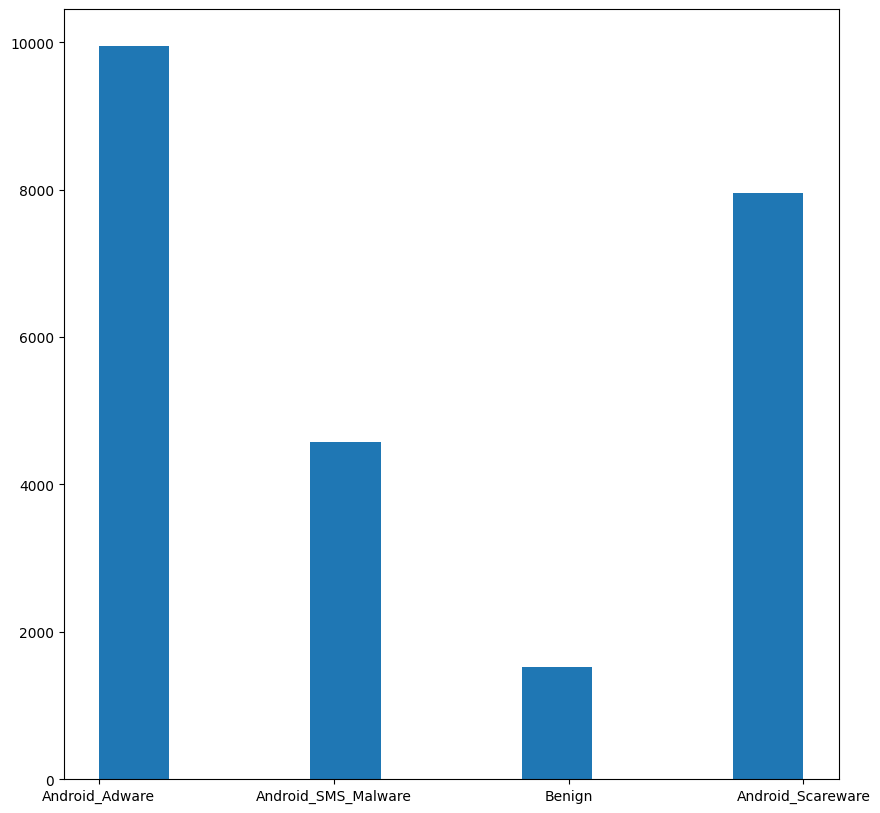

In [20]:
plt.figure(figsize=(10,10))
print(le.inverse_transform(y_train))
plt.hist(le.inverse_transform(y_train))
plt.show()

In [21]:
X_train

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
118389,3590,7673,4,2669,3,1,2,8793,13920,0,...,0,7,0,0,0,0,0,0,0,0
312150,211,4286,3,4070,296,3,1,18230,14921,1,...,0,5,0,0,0,0,0,0,0,0
5700,3326,6843,4,1443,3,1,2,1512,6482,0,...,0,7,0,0,0,0,0,0,0,0
352020,1250,1504,3,10445,3,1,2,10734,10519,0,...,0,5,0,0,0,0,0,0,0,0
160709,106,23530,3,8428,965,3,1,11499,25018,1,...,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249562,3503,1254,3,6302,3,1,2,19280,5406,0,...,0,8,0,0,0,0,0,0,0,0
314887,242,20147,4,11386,728,6,1,18359,10253,7,...,3,7,0,0,0,0,0,0,0,0
12124,660,22784,4,15096,934,6,1,2005,19988,9,...,3,7,1820,0,1796,2004,855,0,826,1134
151657,363,22270,3,11021,890,3,1,11030,20277,6,...,2,7,0,0,0,0,0,0,0,0


In [22]:

tf.random.set_seed(42)

multi_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

multi_classification_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=['accuracy'])

non_normalized_history = multi_classification_model_1.fit(X_train, y_train, epochs=40,validation_data=(X_test, y_test))



Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3227 - loss: 289.8508 - val_accuracy: 0.4010 - val_loss: 1.5135
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4115 - loss: 1.5236 - val_accuracy: 0.4008 - val_loss: 1.2573
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4118 - loss: 1.3008 - val_accuracy: 0.4008 - val_loss: 1.2337
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4118 - loss: 1.2450 - val_accuracy: 0.4008 - val_loss: 1.2233
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4119 - loss: 1.2161 - val_accuracy: 0.4010 - val_loss: 1.2202
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4117 - loss: 1.2106 - val_accuracy: 0.4010 - val_loss: 1.2338
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4113 - loss: 1.2143 - val_accuracy: 0.4013 - val_loss: 1.2269
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4093 - loss: 1.2077 - val_accuracy: 

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


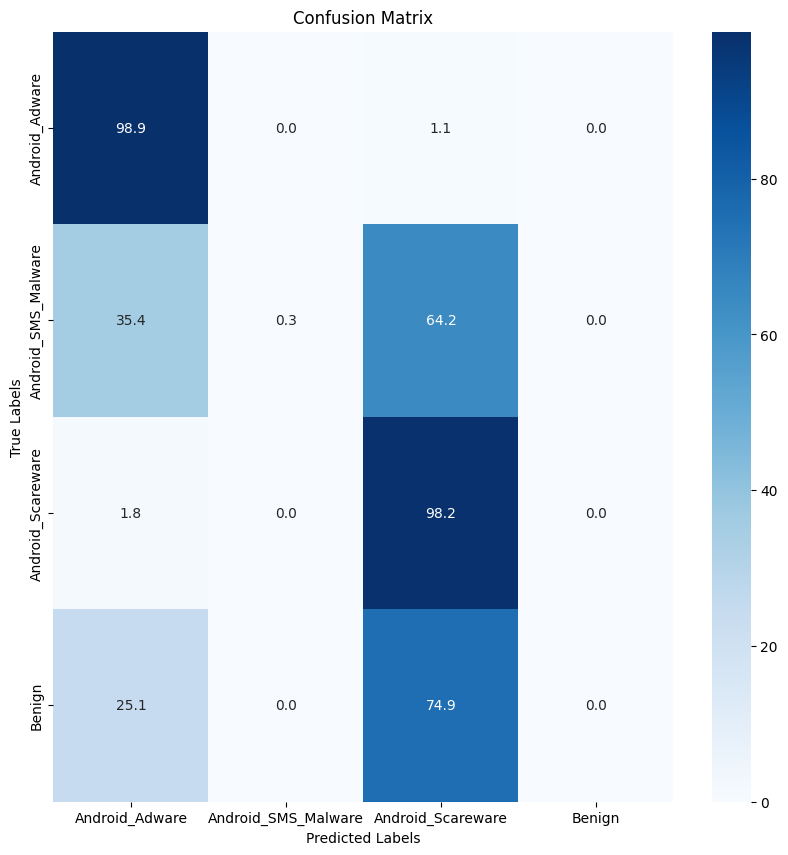

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# Make predictions
# Get most believed prediction for each sample
# map them to the actual lable
# Plot

y_predicted_classes = multi_classification_model_1.predict(X_test)
y_predicted_classes = np.argmax(y_predicted_classes, axis=1)

# Create confusion matrix
confusion_matrix = confusion_matrix(y_test, y_predicted_classes)

# display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix) -> This looked ugly
# display.plot()

# AI  (Calculate Percentages: Divide each element of the confusion matrix by the sum of its corresponding row and multiply by 100 to get the percentage. [:, np.newaxis])
cm_percent = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

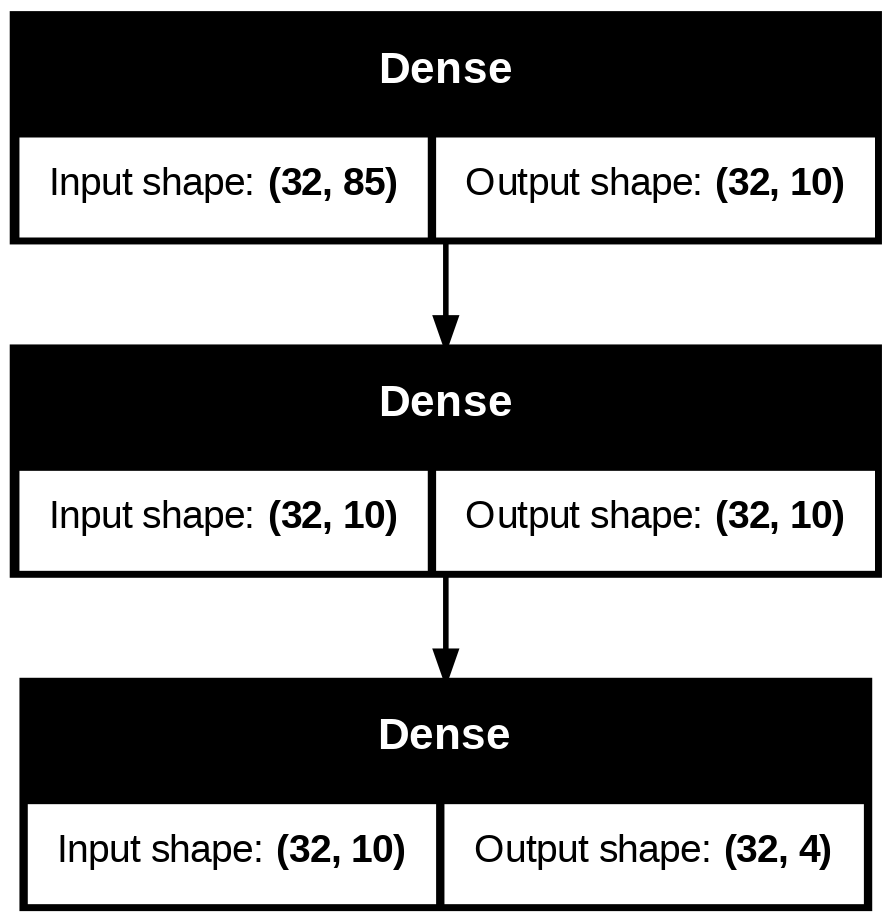

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(multi_classification_model_1, show_shapes=True)

In [33]:
# pd.DataFrame(non_normalized_history.history).plot(title="Non-normalized Data")